In [2]:
import numpy as np
import matplotlib.pyplot as plt
import gridrender as gui
import math
import os
import time
import pdb
import numbers

from gridworld import GridWorld, two_rooms_grid, two_rooms_computeOptions
from RL_methods import PolicyLearning, ValueLearning
from HRL_methods import Option, MAXQ
from anytree import Node, PreOrderIter
from anytree.search import findall_by_attr
from anytree.render import RenderTree

%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)

Populating the interactive namespace from numpy and matplotlib


In [3]:
twoRooms_grid = two_rooms_grid(room_width=10, room_height=7, doorway_pos=3, doorway_height=1, goal_height=0)
twoRooms = GridWorld(gamma=0.95, grid=twoRooms_grid)

## Value estimation in RL

Let's define a first policy that we will test the problem with:

In [4]:
def policy1(state,GridWorld):
    if 0 in GridWorld.state_actions[state]:
        action = 0
    elif 3 in GridWorld.state_actions[state]:
        action = 3
    elif 1 in GridWorld.state_actions[state]:
        action = 1
    else:
        action = 2
    return action    

In [5]:
Q4_ValEst = ValueLearning(1,twoRooms,policy1)
Q4_ValEst.run()
Q4_ValEst.render()

## Policy learning in RL

Stats from last run
Mean reward cumulated over single episode: 2485.27


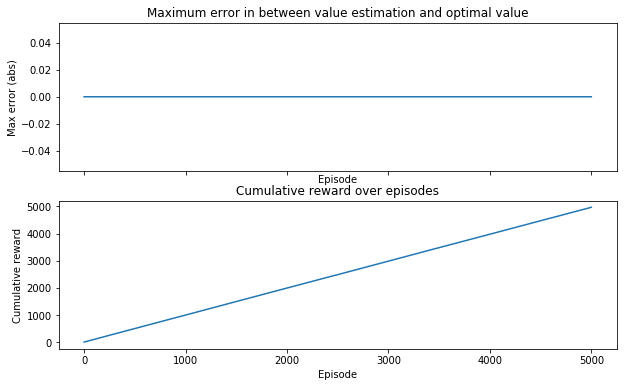

In [6]:
P = PolicyLearning(ind=0, GridWorld=twoRooms)
P.run()
P.stats()
P.render()

gui.render_policy(P.GridWorld, P.policy)

## Hierarchical RL
### MAXQ Algorithm

We will build an option $O_{downward}$ with the following characteristics:
- non-zero probability of being triggered everywhere in the left room, above the doorway
- null probability of being triggered everywhere in the right room
- when triggered, moves downward until it reaches the level of doorway, then moves right towards it
- stops when reaching the grid element just in front of the door from the left room to the right room

Similarly, we will build the $O_{upward}$ that is exactly symmetrical of $O_{downward}$, allowing to reach the doorway from every element in the lower part of the left room.

In [7]:
[downward_initSet,upward_initSet, quitMap, downward_policy_matrix, upward_policy_matrix] = two_rooms_computeOptions(room_width=10, room_height=7, doorway_pos=3, doorway_height=1)

def downward_policy(coords):
    return downward_policy_matrix[coords[0],coords[1]]
def upward_policy(coords):
    return upward_policy_matrix[coords[0],coords[1]]

downward_option = Option(downward_initSet, downward_policy, quitMap, name='Downward to doorway')
upward_option = Option(upward_initSet, upward_policy, quitMap, name='Upward to doorway')

# print(downward_policy_matrix)
# print(upward_policy_matrix)
# print(downward_initSet)
# print(upward_initSet)
# print(quitMap)

In [8]:
MaxQ_2Rooms = MAXQ(twoRooms, alpha0=0.25, expl0=0.9, n_iter=1000, optionSet=[downward_option, upward_option], debug=True)

Training MAXQ on 1000 runs:   0%|          | 0/1000 [00:00<?, ?it/s]

Root
├── right
├── down
├── left
├── up
├── Downward to doorway
│   ├── right
│   ├── down
│   ├── left
│   └── up
└── Upward to doorway
    ├── right
    ├── down
    ├── left
    └── up
Run with Root at coords [1, 8]
Option!
Time 1
Substask chosen 2
Run with left at coords [1, 8]
Primitive!
Time 2
Substask chosen 0
Run with right at coords [1, 7]
Primitive!
Time 3
Substask chosen 0
Run with right at coords [1, 8]
Primitive!
Time 4
Substask chosen 0
Run with right at coords [1, 7]
Primitive!
Time 5
Substask chosen 0
Run with right at coords [1, 8]
Primitive!
Time 6
Substask chosen 1
Run with down at coords [1, 9]
Primitive!
Time 7
Substask chosen 3
Run with up at coords [2, 9]
Primitive!
Time 8
Substask chosen 1
Run with down at coords [1, 9]
Primitive!
Time 9
Substask chosen 3
Run with up at coords [2, 9]
Primitive!
Time 10
Substask chosen 1
Run with down at coords [1, 9]
Primitive!
Time 11
Substask chosen 3
Run with up at coords [2, 9]
Primitive!
Time 12
Substask chosen 1
Run with d

Training MAXQ on 1000 runs: 100%|██████████| 1000/1000 [00:00<00:00, 2284.94it/s]


Primitive!
Time 234
Substask chosen 0
Run with right at coords [1, 11]
Primitive!
Time 235
Substask chosen 2
Run with left at coords [1, 12]
Primitive!
Time 236
Substask chosen 0
Run with right at coords [1, 11]
Primitive!
Time 237
Substask chosen 2
Run with left at coords [1, 12]
Primitive!
Time 238
Substask chosen 3
Run with up at coords [1, 11]
Primitive!
Time 239
Substask chosen 1
Run with down at coords [0, 11]
Primitive!
Time 240
Substask chosen 0
Run with right at coords [1, 11]
Primitive!
Time 241
Substask chosen 2
Run with left at coords [1, 12]
Primitive!
Time 242
Substask chosen 0
Run with right at coords [1, 11]
Primitive!
Time 243
Substask chosen 2
Run with left at coords [1, 12]
Primitive!
Time 244
Substask chosen 0
Run with right at coords [1, 11]
Primitive!
Time 245
Substask chosen 2
Run with left at coords [1, 12]
Primitive!
Time 246
Substask chosen 0
Run with right at coords [1, 11]
Primitive!
Time 247
Substask chosen 0
Run with right at coords [1, 11]
Primitive!
Tim

In [10]:
dir(MaxQ_2Rooms)

['C',
 'GridWorld',
 'V',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'actions',
 'addOption',
 'alpha0',
 'computeGreedyPolicy',
 'evaluate',
 'expl0',
 'explorationPolicy',
 'explorationRate',
 'learningRate',
 'maxActionID',
 'n_iter',
 'rootOption',
 'run',
 'time',
 'unkOptCount']